# Universidad Adolfo Ibañez
## Profesor Miguel Carrasco

### Alberto Bella

## Librerías

In [45]:
# import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import regionprops, label
from sklearn.metrics import mean_absolute_error as mae
from math import sin, cos, pi, degrees
import numpy.matlib
import pandas as pd

## Lectura y procesamiento de la imagen

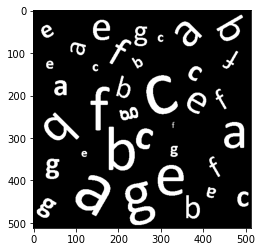

In [2]:
"""
 Universidad Adolfo Ibañez
 Facultad de Ingeniería y Ciencias
 TICS 585 - Reconocimiento de Patrones en imágenes

 Ejemplo de funcion RegionProps
 Autor:. Miguel Carrasco (26-08-2021)
 rev.1.0
"""

# read image (spanish: 'lectura de una imagen')
im = cv2.imread('sopa_letras.png')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# binarize image (spanish: 'binarizamos la imagen')
ret, bw = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)


# label each region (spanish: 'etiquetamos cada imagen')
label_bw = label(bw)

plt.figure()
plt.imshow(bw, cmap='gray')
plt.show()

In [211]:
## Exercise
# 1. Hu moments
# 2. complexity
# 3. perimeter
# 4. roundness
# 5. ellipse angle

result = {
    'hu_1': [],
    'hu_2': [],
    'hu_3': [],
    'hu_4': [],
    'hu_5': [],
    'complexity': [],
    'perimeter': [],
    'roundness': [],
    'ellipse angle': []
}
# print(list(result.keys())[4])

## Funciones

Perimeter:  22
Roundness:  0.7529436938355702
Complexity:  2.227556440552204
Five Hu moments:  [0.2565910861453934, 0.005542654236315665, 0.004675178881691599, 0.006613903483124808, 3.112528485916731e-05]
Ellipse Angle:  -90.0


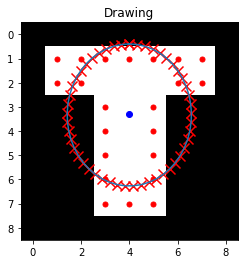

In [171]:
# image for test
im = [[0, 0, 0, 0, 0, 0, 0, 0, 0], \
    [0, 1, 1, 1, 1, 1, 1, 1, 0], \
    [0, 1, 1, 1, 1, 1, 1, 1, 0], \
    [0, 0, 0, 1, 1, 1, 0, 0, 0], \
    [0, 0, 0, 1, 1, 1, 0, 0, 0], \
    [0, 0, 0, 1, 1, 1, 0, 0, 0], \
    [0, 0, 0, 1, 1, 1, 0, 0, 0], \
    [0, 0, 0, 1, 1, 1, 0, 0, 0], \
    [0, 0, 0, 0, 0, 0, 0, 0, 0]]

im = np.array(im)

plt.figure()
plt.title('Drawing')
plt.imshow(im, cmap='gray')

# ---

# moment function
def m(i, j, r, s):
    return(np.sum((i**r)*(j**s)))

# centroid
def c(i, j):
    m10 = m(i, j, 1, 0)
    m01 = m(i, j, 0, 1)
    m00 = m(i, j, 0, 0)

    return(m10/m00, m01/m00)

# central moment function
def mu(i, j, r, s, centroid):
    return(np.sum(((i - centroid[0])**r)*((j - centroid[1])**s)))

def eta(i, j, r, s, centroid):
    t = ((r+s)/2) + 1
    num = mu(i, j, r, s, centroid)
    denom = mu(i, j, 0, 0, centroid)**t
    return(num/denom)

# hu moment function
def hu_five(i, j, centroid):
    Hu = []

    hu_1 = eta(i, j, 2, 0, centroid) + eta(i, j, 0, 2, centroid)
    Hu.append(hu_1)

    hu_2 = (eta(i, j, 2, 0, centroid) - eta(i, j, 0, 2, centroid))**2 + 4*(eta(i, j, 1, 1, centroid)**2)
    Hu.append(hu_2)

    hu_3 = (eta(i, j, 3, 0, centroid) - 3*eta(i, j, 1, 2, centroid))**2 + (3*eta(i, j, 2, 1, centroid) - eta(i, j, 0, 3, centroid))**2
    Hu.append(hu_3)

    hu_4 = (eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))**2 + (eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2
    Hu.append(hu_4)

    hu_5 = (eta(i, j, 3, 0, centroid) - 3*eta(i, j, 1, 2, centroid))*(eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))* \
        ((eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))**2 - 3*(eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2) + \
        (3*eta(i, j, 2, 1, centroid) - eta(i, j, 0, 3, centroid))*(eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))* \
        (3*(eta(i, j, 3, 0, centroid) + eta(i, j, 1, 2, centroid))**2 - (eta(i, j, 2, 1, centroid) + eta(i, j, 0, 3, centroid))**2)
    Hu.append(hu_5)

    return(Hu)

def distance(img):
    region = np.argwhere(img>0)
    binary = np.array(region, dtype='uint8')

    ## Author:. Miguel Carrasco
    #%determinamos el borde 
    #buscamos las coordenadas de los contornos 
    contours, hierarchy = cv2.findContours(np.array(img, dtype='uint8'), 
                                        cv2.RETR_CCOMP , # retrives contour in 2 heriarchy levels (inner and outer) // RETR_EXTERNAL 
                                        cv2.CHAIN_APPROX_NONE)

    # generamos una matriz (fila/columna) con los contornos
    contornos = np.empty((0, 2), dtype='uint8')
    for contour in contours:
        contornos = np.append(contornos, np.vstack(contour), axis=0)

    # contornos = np.vstack(contours[0])

    # extraemos las coordenadas x,y 
    x , y = zip(*contornos)
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)

    # calculo del centro de masa
    [ci, cj] = c(region[:, 0], region[:, 1])
    
    # distancia euclidiana
    # dd = np.sqrt((x-ci)**2+(y-cj)**2)
    
    # distancia city block
    dd = np.abs(x-ci) + np.abs(y-cj)
    
    # distancia chessboard
    # dd = np.amax(np.stack((np.abs(x-ci), np.abs(y-cj)), axis=1), axis=1)

    #descriptores normalizados 
    dmean = np.mean(dd)
    dmax  = np.max(dd)/dmean
    dmin  = np.min(dd)/dmean
    delta = dmax/dmin
    features = dmax, dmin, delta, ci, cj, x, y, dmean

    return features

def fitzgibbon(x, y):

    ## Author:. Miguel Carrasco
    # algoritmo de Fitzgibbon (1996) para la estimación de una elipse
    # a partir de las coordenadas de la frontera de una región
    
    #puntos de la frontera
    n = x.shape[0]
    # matriz X
    D = [x**2, x*y, y**2, x, y, np.ones((n,1))]
    D = np.hstack(D)
    # matriz dispersión
    S = np.matmul(D.T,D)
    C = np.zeros((6,6))
    # matriz restricción
    C[0,2]=2; C[1,1]=-1; C[2,0]=2; 

    # Problema: S·a = lambda·C·a 
    # --> Solución a traves de Eigenvalues
    E,V = np.linalg.eig(np.dot(np.linalg.inv(S),C))
    idx = np.argwhere(E>0 & ~np.isinf(E))
    # seleccionamos el valor propio
    params = V[:,idx]
    return params

def parametros(x, y):

    ## Author:. Miguel Carrasco
    # Funcion que busca los parametros parametricos
    # de la elipse segun las coordendas de los bordes.

    # parametros de fitzgibbon
    a,b,c,d,e,f = fitzgibbon(x, y)

    #estimados de angulos y factores de Fitzgibbon
    alpha = np.arctan2(b,a-c)/2

    ct = np.cos(alpha)
    st = np.sin(alpha)
    ap = a*ct*ct + b*ct*st + c*st*st
    cp = a*st*st - b*ct*st + c*ct*ct

    #% get translations
    T = np.array([[a,  b/2],
                  [b/2, c]])
    T = T.reshape(2,2)
    t = -1* np.matmul(np.linalg.inv(2*T),np.array([d, e]).reshape(2,1))
    cx = t[0]
    cy = t[1]

    #% factor de escala
    val = np.matmul(t.T,np.matmul(T,t))
    scale = 1 / (val- f)

    #% parametros
    r1 = 1/np.sqrt(scale*ap)
    r2 = 1/np.sqrt(scale*cp)
    v = np.array([r1, r2, cx, cy, alpha], dtype=object)
    return v

def draw_ellipse(binary, v, N=100):
    ## Author:. Miguel Carrasco
    # funcion auxiliar que permite dibujar una ellipse
    ae, be, x0, y0, alfa = v
    #angulo de rotación interno
    theta = np.linspace(0, 2*pi, N) 
    
    #parametro estimado anteriormente
    R = np.array([[cos(alfa), -sin(alfa)],
                  [sin(alfa), cos(alfa)]])
    R = R.reshape(2,2)

    X = ae*np.cos(theta)
    Y = be*np.sin(theta)
    M = np.array([X,Y]).reshape(2,-1)
    CC=np.matmul(R,M) + \
    np.matlib.repmat(np.array([x0,y0]).reshape(2,1),1,N)

    return CC


# first, we select the region
region = np.argwhere(im>0)

dmax, dmin, delta, ci, cj, x, y, dmean  = distance(im)

## Draw Contour and Centroid
plt.scatter(x, y, marker='.', s=100, c='red')
plt.plot(cj, ci, marker = 'o', color ='blue')

## Perimeter
L = len(x) # quantity of pixels that are in the contour
print('Perimeter: ', L)
A = len(region) # quantity of pixels included in the region

## Roundness
R = (4*A*pi)/L**2
print('Roundness: ', R)

## Complexity
complexity = A/(dmean**2)
print('Complexity: ', complexity)

## Hu moments (five)
print('Five Hu moments: ', hu_five(region[:, 0], region[:, 1], [cj, ci]))

## Ellipse Angle
# parameters of the ellipse
v = parametros(x, y)
# alpha angle in last pos
print('Ellipse Angle: ', round(degrees(v[len(v)-1]), 2))

## Draw Ellipse
# n° of points
N = 50 
# ellipse coords
CC = draw_ellipse(im, v, N)
plt.scatter(CC[0,:], CC[1,:], marker='x', s=100, c='red')
plt.plot(CC[0,:], CC[1,:])

plt.show()

Distancia máxima: 1.972634216803274
Distancia minima: 0.2921403505850716


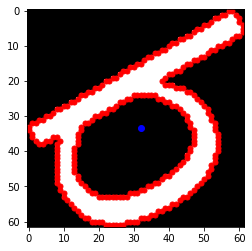

Complexity:  1.46


In [173]:
regions = regionprops(label_image = label_bw)

dmax, dmin, delta, ci, cj, x, y, dmean  = distance(regions[0].image*1)
print(f'Distancia máxima: {dmax}')
print(f'Distancia minima: {dmin}')

plt.figure()
plt.imshow(regions[0].image*1, cmap="gray")
plt.scatter(x, y, marker='.', s=100, c='red')
plt.plot(cj, ci, marker = 'o', color ='blue')
plt.show()

complex = regions[0].area/dmean**2
print('Complexity: ', round(complex, 2))
# print(regions[0].perimeter)

## Ejercicios

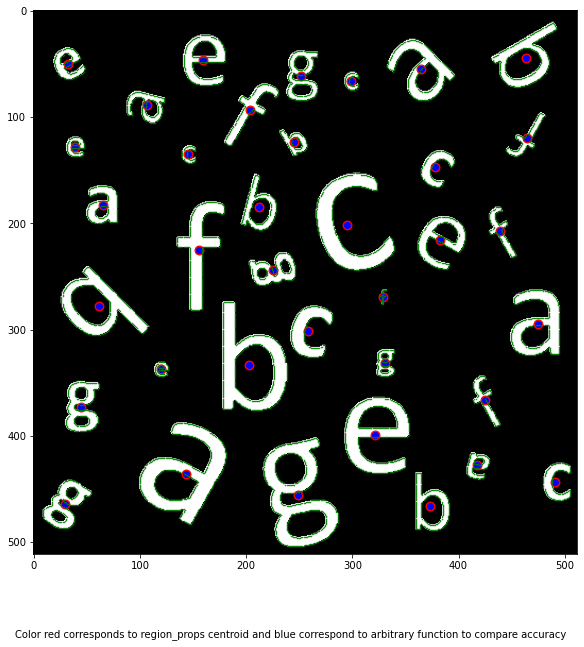

In [212]:
plt.figure(figsize=(10, 10))
plt.imshow(bw, cmap='gray')

for prop in regionprops(label_image = label_bw):
    
    # binarize the image
    binary = (prop.image*1).astype('uint8')
    # get region coord
    region = np.argwhere(binary>0)

    # get the right centroid from the general picture
    region_centroid = c(region[:, 0], region[:, 1])
    region_centroid_fixed = (region_centroid[0] + prop.bbox[0], region_centroid[1] + prop.bbox[1]) # fixed position for the general image
    # check results
    # print(mae(prop.centroid, region_centroid_fixed))

    plt.scatter(prop.centroid[1], prop.centroid[0], c='red', s=80)
    plt.scatter(region_centroid_fixed[1], region_centroid_fixed[0], c='blue')

    # General elements to be used in further calculations
    dmax, dmin, delta, ci, cj, x, y, dmean  = distance(binary)

    ## 1. 5 hu moments
    hu_moments = hu_five(region[:, 0], region[:, 1], region_centroid)
    for i in range(5):
        result[list(result.keys())[i]].append(hu_moments[i])

    ## 2. Complexity
    A = len(region) # quantity of pixels included in the region
    complexity = 1/A*(dmean)
    result['complexity'].append(complexity)

    ## 3. Perimeter or Contour
    plt.scatter(x + prop.bbox[1], y + prop.bbox[0], marker='.', s=1, c='green')
    # L = len(x) # quantity of pixels that are in the contour
    L = prop.perimeter
    result['perimeter'].append(L)

    ## 4. Roundness
    R = (4*A*pi)/L**2
    result['roundness'].append(R)

    ## 5. Ellipse angle
    v = parametros(x, y)
    angle = round(degrees(v[len(v)-1]), 2)
    result['ellipse angle'].append(angle)

plt.figtext(0.11, 0.01, 'Color red corresponds to region_props centroid and blue correspond to arbitrary function to compare accuracy')
plt.show()

In [214]:
result = pd.DataFrame(result)
result

,hu_1,hu_2,hu_3,hu_4,hu_5,complexity,perimeter,roundness,ellipse angle
0,0.425378,0.025908,0.013871,0.000732,2.333260e-06,0.023787,330.090404,0.139781,-43.15
1,0.337127,0.003917,0.000911,0.000407,-1.525453e-07,0.023762,272.752309,0.164187,85.70
2,0.363250,0.011855,0.002181,0.000449,-3.643555e-07,0.020790,330.031529,0.151598,42.67
3,0.257982,0.001658,0.000276,0.000161,-1.286308e-08,0.030079,163.580736,0.219312,55.69
4,0.364220,0.032158,0.001117,0.000161,-6.667873e-08,0.033383,284.551299,0.115158,5.21
5,0.292098,0.010319,0.002518,0.000852,-1.248103e-06,0.066753,66.698485,0.370040,90.00
6,0.533992,0.213339,0.025221,0.008095,1.037184e-04,0.034696,215.178716,0.203008,38.99
7,0.354090,0.010660,0.002156,0.000553,-4.243557e-07,0.037350,200.367532,0.152435,11.46
8,0.535181,0.213728,0.025933,0.008523,1.147722e-04,0.051747,153.166522,0.205154,39.12
9,0.292864,0.012324,0.004910,0.000336,4.283299e-07,0.042738,124.710678,0.228659,44.14
